In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/oscars.csv')

In [3]:
pd.set_option("display.max_columns", None)

In [4]:
df.head(20)

,film,ceremony,actor_in_a_leading_role,actor_in_a_supporting_role,actress_in_a_leading_role,actress_in_a_supporting_role,animated_feature_film,animated_short_film,best_picture,cinematography,costume_design,directing,documentary_feature_film,documentary_short_film,film_editing,international_feature_film,live_action_short_film,makeup_and_hairstyling,music_original_score,music_original_song,production_design,sound,visual_effects,writing_adapted_screenplay,writing_original_screenplay,total_oscars_won,won,title_type,imdb_rating,runtime_mins,year,num_votes,directors,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,news,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,38,59th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Movie,6.2,97.0,1986,203,Wolfgang Glück,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Crocodile Dundee,59th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Movie,6.6,97.0,1986,119780,Peter Faiman,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Round Midnight,59th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,Movie,7.4,133.0,1986,6086,Bertrand Tavernier,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,10,52nd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Movie,6.1,122.0,1979,19854,Blake Edwards,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,102 Dalmatians,73rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Movie,4.9,100.0,2000,40686,Kevin Lima,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,12,80th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Movie,7.5,159.0,2007,15671,Nikita Mikhalkov,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,12 Angry Men,30th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Movie,9.0,96.0,1957,920267,Sidney Lumet,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,12 Monkeys,68th,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Movie,8.0,129.0,1995,662683,Terry Gilliam,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
8,12 Years A Slave,86th,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,1,Movie,8.1,134.0,2013,762589,Steve McQueen,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9,127 Hours,83rd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Movie,7.5,94.0,2010,413014,Danny Boyle,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
df['won'].value_counts()

won
0    3394
1    1254
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.92      0.84       679
           1       0.56      0.29      0.38       251

    accuracy                           0.75       930
   macro avg       0.67      0.60      0.61       930
weighted avg       0.72      0.75      0.72       930

Confusion Matrix:


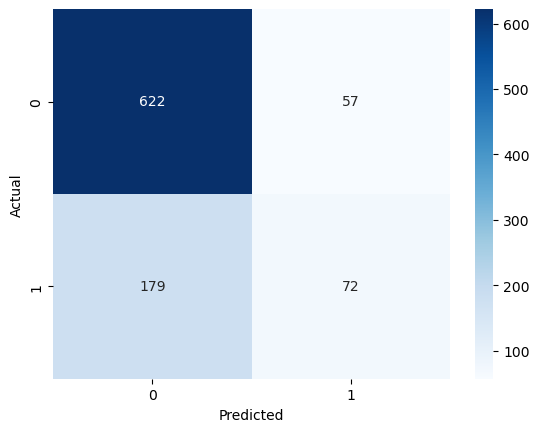

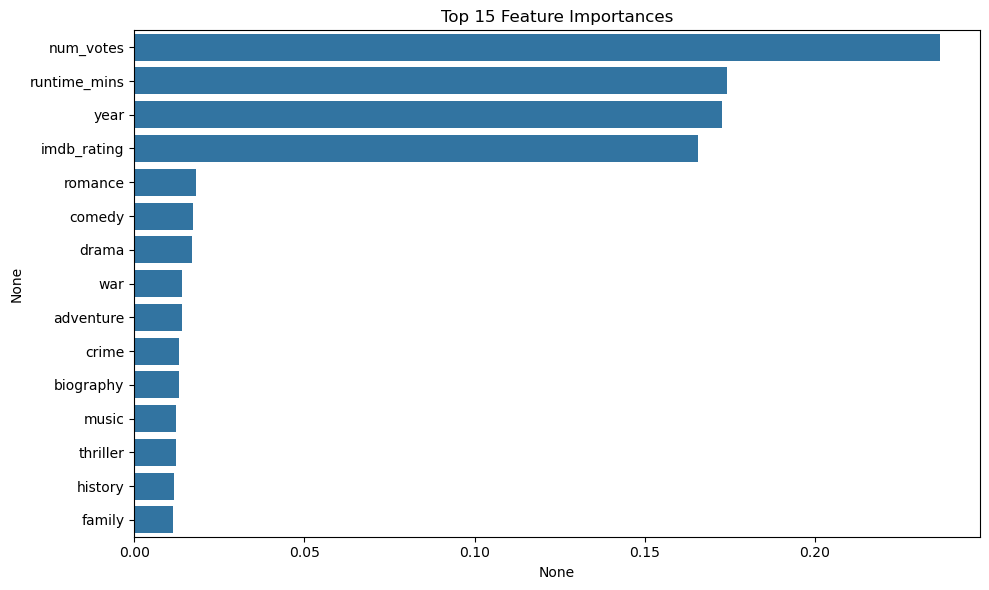

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Drop ID-like/non-numeric columns
df_model = df.drop(columns=['film', 'title_type', 'directors', 'ceremony', 
    'actor_in_a_leading_role', 'actor_in_a_supporting_role',
    'actress_in_a_leading_role', 'actress_in_a_supporting_role',
    'animated_feature_film', 'animated_short_film',
    'best_picture', 'cinematography', 'costume_design',
    'directing', 'documentary_feature_film', 'documentary_short_film',
    'film_editing', 'international_feature_film', 'live_action_short_film',
    'makeup_and_hairstyling', 'music_original_score', 'music_original_song',
    'production_design', 'sound', 'visual_effects',
    'writing_adapted_screenplay', 'writing_original_screenplay',
    'total_oscars_won'])

# Step 2: Define features and target
X = df_model.drop(columns=['won'])
y = df_model['won']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 5: Predict and Evaluate
y_pred = rf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 6: Feature Importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=importances[:15], y=importances.index[:15])
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

X = df.drop(['won', 'ceremony', 'film', 'title_type', 'directors'], axis=1)
y = df['won']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.8, random_state=42)

In [6]:
X.head()

,actor_in_a_leading_role,actor_in_a_supporting_role,actress_in_a_leading_role,actress_in_a_supporting_role,animated_feature_film,animated_short_film,best_picture,cinematography,costume_design,directing,documentary_feature_film,documentary_short_film,film_editing,international_feature_film,live_action_short_film,makeup_and_hairstyling,music_original_score,music_original_song,production_design,sound,visual_effects,writing_adapted_screenplay,writing_original_screenplay,total_oscars_won,imdb_rating,runtime_mins,year,num_votes,action,adventure,animation,biography,comedy,crime,documentary,drama,family,fantasy,film-noir,history,horror,music,musical,mystery,news,romance,sci-fi,short,sport,talk-show,thriller,war,western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.2,97.0,1986,203,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.6,97.0,1986,119780,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.4,133.0,1986,6086,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.1,122.0,1979,19854,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.9,100.0,2000,40686,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2716
           1       1.00      1.00      1.00      1003

    accuracy                           1.00      3719
   macro avg       1.00      1.00      1.00      3719
weighted avg       1.00      1.00      1.00      3719



In [8]:
rf.feature_importances_

array([5.29049425e-04, 3.50606505e-03, 9.63585838e-03, 2.91647242e-02,
       1.55067599e-03, 2.82158664e-02, 2.78905857e-03, 9.84925458e-03,
       9.12269006e-03, 7.42836992e-03, 1.28617734e-02, 2.07413914e-02,
       3.22045885e-03, 7.33523966e-03, 2.99982864e-02, 3.14043283e-03,
       4.20369662e-03, 2.40625750e-02, 1.72139546e-02, 2.47511366e-02,
       1.57849202e-02, 1.66377819e-02, 4.51834970e-02, 6.34296726e-01,
       1.45550627e-02, 5.28655717e-03, 3.09439539e-03, 8.70732702e-03,
       5.27440923e-05, 2.76255041e-04, 6.18729129e-04, 2.73517001e-04,
       5.53023461e-04, 1.12137493e-04, 2.07495864e-04, 7.70807780e-04,
       3.15722400e-04, 2.85685794e-04, 5.09649152e-04, 2.88416400e-04,
       1.53859611e-04, 3.57488371e-04, 1.36943314e-04, 4.84588054e-04,
       1.64211749e-06, 2.13276340e-04, 2.28586990e-04, 2.31080835e-04,
       2.50576395e-04, 0.00000000e+00, 2.24270384e-04, 4.06572274e-04,
       1.80106773e-04])